# Monte Carlo simulaties#
Behorende bij e werkzittingen van 27/10/2020

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

## Hypocycloide ##
Basis Monte-Carlo integratie

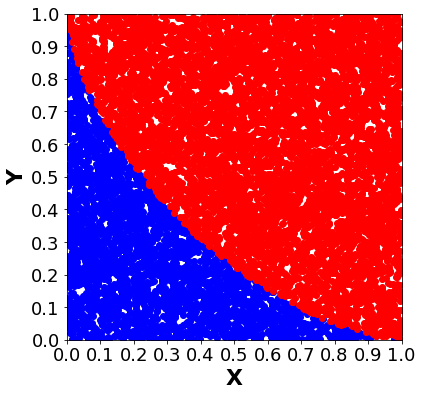

Het MC-oppervlak voor de hypocycloide is  1.1872 . (=?=  1.1780972450961724  exact))


In [4]:
N=10000 # aantal pogingen
a=1.0

##Verzameling punten
# de hits
Nhit=0
xh=np.zeros(N+1)
yh=np.zeros(N+1)
# de missers
Nmis=0
xm=np.zeros(N+1)
ym=np.zeros(N+1)

power=(2.0/3.0)
a23=a**power
for j in range(N):
    x=np.random.uniform(0.0,1.0,1) # 1 random getal uniform getrokken uit het interval 0-1
    y=np.random.uniform(0.0,1.0,1) # 1 random getal uniform getrokken uit het interval 0-1
    r23=x**power+y**power
    if (r23<=a23):
        xh[Nhit]=x
        yh[Nhit]=y
        Nhit+=1
    else:
        xm[Nmis]=x
        ym[Nmis]=y
        Nmis+=1

#Plotje
plt.figure(figsize=(6,6))
plt.scatter(xh[:Nhit], yh[:Nhit],  color='blue', zorder=1)
plt.scatter(xm[:Nmis], ym[:Nmis],  color='red', zorder=1)

plt.axis([0.0,1.0,0.0,1.0])
XYlst=np.linspace(0.0,1.0,11)
plt.xticks(XYlst,fontsize=18)
plt.yticks(XYlst,fontsize=18)
plt.xlabel("X",fontsize=22,fontweight="bold")
plt.ylabel("Y",fontsize=22,fontweight="bold")
plt.show()
print("Het MC-oppervlak voor de hypocycloide is ",4.0*Nhit/N,". (=?= ",3.0*np.pi*a*a/8.0," exact))")

## Hypocycloide ##
Basis Monte-Carlo convergentie

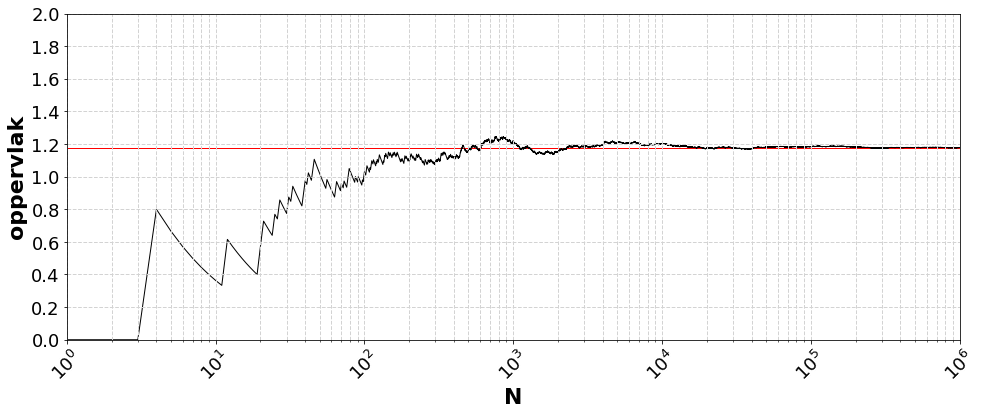

In [5]:
N=1000000 # maximum aantal pogingen
a=1.0
aval=3.0*np.pi*a*a/8.0

##Verzameling punten
# de hits
Hitcount=0
Nhit=np.zeros(N+1)
Nval=np.zeros(N+1)

power=(2.0/3.0)
a23=a**power
#alle random getallen in 1x
x=np.random.uniform(0.0,1.0,N) # N random getal uniform getrokken uit het interval 0-1
y=np.random.uniform(0.0,1.0,N) # N random getal uniform getrokken uit het interval 0-1

#tel de hits
for j in range(N):
    r23=x[j]**power+y[j]**power
    if (r23<=a23):
        Hitcount+=1
    Nhit[j]=(Hitcount/(j+1))*4
    Nval[j]=j

#Plotje
plt.figure(figsize=(16,6))
plt.plot(Nval[0:N], Nhit[0:N],   color="black"  ,linewidth=1, zorder=-1, alpha=1)
Xfl=[0,N]
Yfl=[aval,aval]
plt.plot(Xfl[0:2], Yfl[0:2],   color="red"  ,linewidth=1, zorder=-2, alpha=1)

plt.xscale("log")
plt.yscale("linear")
plt.axis([1,N,0,2.0])
plt.xticks(rotation=45,fontsize=18)
XYlst=np.linspace(0.0,2.0,11)
plt.yticks(XYlst,fontsize=18)

plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("oppervlak",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.show()


## Hyper-spheres ##
n-dimensionale hyper-bal

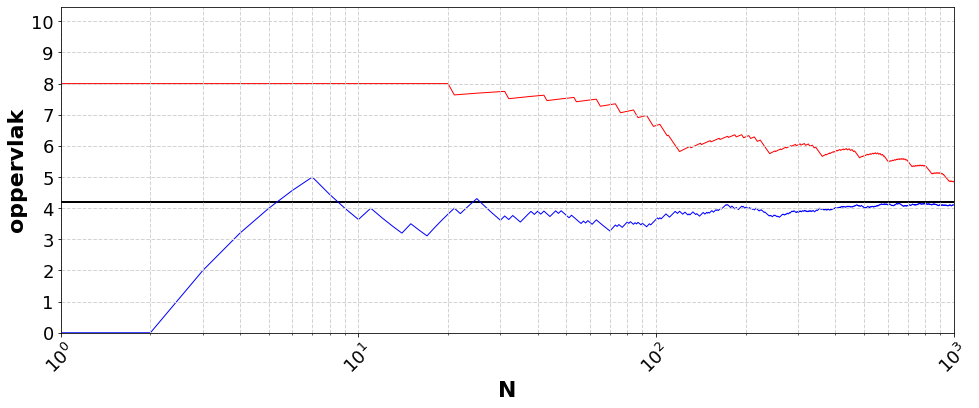

In [21]:
ndim=3
N=1000

fac=2**ndim


xR=np.random.uniform(0.0,1.0,(N,ndim)) # N random getal uniform getrokken uit het interval 0-1
if ndim==1:
    xL=np.linspace((0.0,),(1.0,),N)
    vol=2.0
elif ndim==2:
    Nd=int(np.sqrt(N))
    step=1.0/Nd
    xL=np.mgrid[0.0:1.0+0.5*step:step,0.0:1.0+0.5*step:step].reshape(2,-1).T
    vol=np.pi
elif ndim==3:
    Nd=int(np.cbrt(N))
    step=1.0/Nd
    xL=np.mgrid[0.0:1.0+0.5*step:step,0.0:1.0+0.5*step:step,0.0:1.0+0.5*step:step].reshape(3,-1).T
    vol=(4.0/3.0)*np.pi
       
HitcR=0
HitcL=0
NhitR=np.zeros(N+1)
NhitL=np.zeros(N+1)
Nval=np.zeros(N+1)

#tel de hits random geval
for j in range(N):
    r=xR[j,:]
    rl=np.sum(r*r)
    if (rl<=1.0):
        HitcR+=1
    NhitR[j]=(HitcR/(j+1))*fac
    Nval[j]=j
#tel de hits lineair geval
for j in range(N):
    r=xL[j,:]
    rl=np.sum(r*r)
    if (rl<=1.0):
        HitcL+=1
    NhitL[j]=(HitcL/(j+1))*fac
   
#Plotje
plt.figure(figsize=(16,6))
plt.plot(Nval[0:N], NhitL[0:N],   color="red"  ,linewidth=1, zorder=-1, alpha=1)
plt.plot(Nval[0:N], NhitR[0:N],   color="blue"  ,linewidth=1, zorder=-1, alpha=1)

Xfl=[0,N]
Yfl=[vol,vol]
plt.plot(Xfl[0:2], Yfl[0:2],   color="black"  ,linewidth=2, zorder=-2, alpha=1)

plt.xscale("log")
plt.yscale("linear")
plt.axis([1,N,0,2.5*vol])
plt.xticks(rotation=45,fontsize=18)
XYlst=np.linspace(0.0,int(2.5*vol),11)
plt.yticks(XYlst,fontsize=18)

plt.xlabel("N",fontsize=22,fontweight="bold")
plt.ylabel("volume",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.show()
## LET OP: uit de ondergaande figuur kun je iets leren over de convergentie van het random grid, 
#  voor het equidistant grid is enkel het laatste punt relevant, en om convergentie te vergelijken die je over meerdere 
#  grids te runnen.